# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 2:</center>
### <center> Propiedades en Venta </center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as skp

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from collections import defaultdict
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

import plotly.graph_objects as go
%matplotlib inline

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


Descargo los datos para el modelo 1

In [2]:
_x_train_model1 = pd.read_csv('./DataSet/x_train')
_x_train_model1.drop(columns=['Unnamed: 0'],inplace=True)
_y_train_model1 = pd.read_csv('./DataSet/y_train')
_y_train_model1.drop(columns=['Unnamed: 0'],inplace=True)
_x_test_model1 = pd.read_csv('./DataSet/x_test')
_x_test_model1.drop(columns=['Unnamed: 0'],inplace=True)
_y_test_model1 = pd.read_csv('./DataSet/y_test')
_y_test_model1.drop(columns=['Unnamed: 0'],inplace=True)
_y_train_model1.rename(columns={'0':'pxm2'}, inplace=True)
_y_test_model1.rename(columns={'0':'pxm2'}, inplace=True)

# 3. Ensamble de modelos

Construir dos ensambles de modelos de tipo híbridos :

* Ensamble 1: ensamble tipo Voting para el conjunto de datos de clasificación.
Obtener sus métricas y comparar los resultados con los obtenidos en los puntos
anteriores.

* Ensamble 2: ensamble de tipo Stacking combinando diferentes modelos de
regresión y utilizando un modelo adicional para estimar el valor final. Mostrar las
métricas obtenidas y comparar con los resultados obtenidos en los puntos
anteriores.

### Ensamble 1: Vooting


El clasificador de votaciones tiene dos hiperparámetros básicos: estimadores y votaciones. 

El hiperparámetro estimators crea una lista los clasificadores y les asigna nombres. 

El hiperparámetro de votación se establece en "hard" o "soft".

* hard: el clasificador de votación usa las etiquetas de clase predichas para la votación por regla de la mayoría. 

* soft: utilizará un enfoque ponderado para tomar su decisión (predice la etiqueta de clase en función del argmax de las sumas de las probabilidades predichas)

In [3]:
#Armo conjunto entrenamiento y test 80-20
#Ejecutare mis modelos con una copia
x_train = _x_train_model1.copy()
y_train = _y_train_model1.copy()
x_test = _x_test_model1.copy()
y_test = _y_test_model1.copy()

In [4]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [5]:
#Creo un conjunto de datos para entrenar los modelos

x, y = make_classification(n_samples=3000, 
                           n_features=20, 
                           n_informative=15, 
                           n_redundant=5,
                           n_clusters_per_class=5,
                           class_sep=0.7,
                           flip_y=0.03,
                           n_classes=2)

In [6]:
#Creo clasificadores
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=11)
#arbol_clf=  DecisionTreeClassifier()

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('lr', log_clf), 
                                         ('rnd', rnd_clf), 
                                         ('knn', knn_clf)], 
                                         #('arbol', arbol_clf)], 
                                        voting = 'hard')




#Armo conjunto entrenamiento y test 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)


#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)
accuracy_score(y_test, pred)

0.8066666666666666

In [7]:
# Visualizamos algunas metricas para cada modelo por separado
list_of_classifiers = [log_clf,rnd_clf, knn_clf, vot_clf]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, f1_score(y_test, pred))
    print("Accuracy:")
    print(classifier.__class__.__name__, accuracy_score(y_test, pred))
    print("----------")

F1 Score:
LogisticRegression 0.6385135135135135
Accuracy:
LogisticRegression 0.6433333333333333
----------
F1 Score:
RandomForestClassifier 0.8025889967637542
Accuracy:
RandomForestClassifier 0.7966666666666666
----------
F1 Score:
KNeighborsClassifier 0.8184713375796179
Accuracy:
KNeighborsClassifier 0.81
----------
F1 Score:
VotingClassifier 0.7980456026058631
Accuracy:
VotingClassifier 0.7933333333333333
----------


In [8]:
#Performance el modelo en entrenamiento
voting_scores = evaluate_model(vot_clf, x_train, y_train)
model_scores['voting'] = voting_scores

NameError: name 'evaluate_model' is not defined

In [10]:
#Grafico performance


# Ensamble 2: Stacking

In [11]:
#Creo un conjunto de datos para entrenar los modelos
x, y = make_regression(n_samples=3000, 
                           n_features=20, 
                           n_informative=15, 
                           random_state= None)

In [12]:
#Funcion para evaluar los modelos 5fold -CV (repite 2 veces)
def evaluate_model(model, x, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores

In [13]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

**Entrenamiento y evaluación de modelos individuales**

Para obtener un nivel de referencia de performance y poder compararlo con el ensamble, entrenaremos y evaluaremos individualmente los siguientes modelos base:

* Bosque aleatorio con 50 árboles de decisión (RF).
* Máquina de vectores de soporte (SVM)
* Regresión Logistica


Cada uno de los modelos se evaluará utilizando una estrategia de validación cruzada de cinco folds repetida dos veces. En cada iteracion cada modelo se entrenó en el 80 % de los datos y se validó en el 20 % restante.

Este método da como resultado 10 puntajes de performance diferentes para cada modelo que se almacenarán en un diccionario.

In [14]:
#Armo conjunto entrenamiento y test 80-20
#Ejecutare mis modelos con una copia
x_train = _x_train_model1.copy()
y_train = _y_train_model1.copy()
x_test = _x_test_model1.copy()
y_test = _y_test_model1.copy()


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

In [15]:
#Modelos Base
base_models = {'knn':KNeighborsRegressor(),
               'arbol': DecisionTreeRegressor(),
               'linearRegression': LinearRegression()
              }

#Guarda los scores de cada modelo
model_scores = defaultdict()

#Entreno los regresores
for name, model in base_models.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, x_train, y_train)
    model_scores[name] = scores

Evaluating knn


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating arbol
Evaluating linearRegression


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


In [16]:
from sklearn.ensemble import StackingRegressor

#Modelos Base
base_models = [('knn', KNeighborsRegressor()),
               ('arbol', DecisionTreeRegressor()),
               ('linearRegression', LinearRegression())]

#Meta Modelo
meta_model = RandomForestRegressor()

#Ensemble Stacking
stacking_model = StackingRegressor(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [17]:
#Performance el modelo en entrenamiento
stacking_scores = evaluate_model(stacking_model, x_train, y_train)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    8.0s finished


ValueError: x and y must be the same size

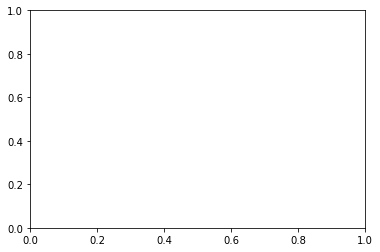

In [18]:
#Grafico del error cuadrático medio

# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



In [19]:
#Evaluo en conjunto de test
#stacking_model.fit(x_train,y_train).score(x_test,y_test)
stacking_model.fit(x_train,y_train)
y_pred_st = stacking_model.predict(x_test)
mean_squared_error(y_test, y_pred_st, squared= False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


11.126434771614248